In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
df=pd.read_csv('https://rb.gy/ktivhd')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [34]:
df.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559


In [35]:
data = df.drop(['name'],axis=1)
data.head(2)

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679


rating is an independent feature, whereas others are dependent features, rating depends on other factors/features

In [36]:
print(set(data['shelf']))

{1, 2, 3}


In [37]:
from sklearn.preprocessing import LabelEncoder   #converts data to numeric value
le = LabelEncoder()

In [38]:
X = data.iloc[:,:-1].values #independent      #.values converts this into numpy array
y = data.iloc[:,-1].values  #dependent

In [39]:
data.isnull().sum()

mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [40]:
for i in range(2):
    X[:,i]=le.fit_transform(X[:,i])

Correlation is the association or relationship b/w variables, if X increases then y also increases so it is positive correlation
if X increases then y decreases so it is negative correlation
[-1,1] is the range for correlation, 1 is positive correlation, 0 is no correlation, -1 is negative correlation.

In [41]:
from scipy.stats import pearsonr

In [42]:
#This cell is used to find the correlation of individual column with output(rating column)
correlation = []
for i in range(0,len(data.columns)-1):
    cor_x = X[:,i] 
    cor_y = y
    corr,corr1 = pearsonr(cor_x,cor_y)
    correlation.append(corr)

In [43]:
correlation #this has 2 values 1st is correlation coefficient and second is p-values which is used in hypothesis

[0.14094240837554287,
 0.20302370742156065,
 -0.6893760311652586,
 0.4706184645492594,
 -0.40928366014780976,
 -0.40129520449484846,
 0.584160419951584,
 0.0520546612337646,
 -0.7596746584301078,
 0.38016536869410056,
 -0.24054361076908154,
 0.02515881567911684,
 -0.2981239849779471,
 -0.20316006300817877]

<BarContainer object of 14 artists>

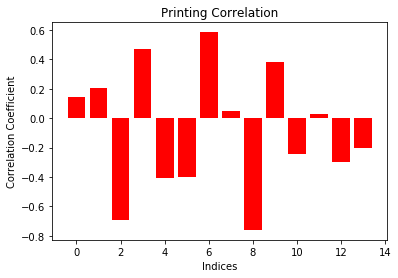

In [44]:
plt.title("Printing Correlation")
plt.xlabel("Indices")
plt.ylabel("Correlation Coefficient")
plt.bar([i for i in range(14)],correlation,color='red')

In [45]:
#taking only those columns whose correlation coefficient falls in a category, remember this may differ from problem to problem

index = []
for i in range(0,len(correlation)):
    if(correlation[i]<=0.29 and correlation[i]>=-0.29):
        index.append(i)
print(index)

[0, 1, 7, 10, 11, 13]


In [46]:
drop_col=[]
for i in index:
    col = data.columns[i]
    drop_col.append(col)
drop_col

['mfr', 'type', 'carbo', 'vitamins', 'shelf', 'cups']

In [47]:
data= data.drop(drop_col,axis=1)
data.head()

,calories,protein,fat,sodium,fiber,sugars,potass,weight,rating
0,70,4,1,130,10.0,6,280,1.0,68.402973
1,120,3,5,15,2.0,8,135,1.0,33.983679
2,70,4,1,260,9.0,5,320,1.0,59.425505
3,50,4,0,140,14.0,0,330,1.0,93.704912
4,110,2,2,200,1.0,8,-1,1.0,34.384843


In [48]:
X= data.iloc[:,:-1].values

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
y_pred = model.predict(X_test)

In [52]:
model.score(X_test,y_test) #no regularization

0.9809490518036356

data is overfitting as accuracy is high, so there is need for regularization, so this will result in high testing error
Regularization is like boundation, adding constraints or restrictions to the model.
L1 -> degree of penalty term in cost function is 1 so it is L1 regularization or Lasso 
L2 -> degree of penalty term in  cost function is 2 so it is L2 regularization or Ridge
alpha means how much constraints, the less means same , but more than more constraints, more alpha more regularization

In [53]:
from sklearn.linear_model import Ridge
ridge_reg_1 = Ridge(alpha=1,normalize=True)
ridge_reg_1.fit(X_train,y_train)
ridge_reg_1.score(X_test,y_test)            # when alpha = 1

0.8357986343802001

In [54]:
ridge_reg_2 = Ridge(alpha=0.5,normalize=True)
ridge_reg_2.fit(X_train,y_train)
ridge_reg_2.score(X_test,y_test)             #when alpha = 0.5

0.9127890842653915

In [55]:
ridge_reg_3 = Ridge(alpha=2,normalize=True)
ridge_reg_3.fit(X_train,y_train)
ridge_reg_3.score(X_test,y_test)           #when alpha=2

0.7035121474971793

So there a great dip, so while regularizing we should make sure for making alpha to optimal